In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("./wbes_sintetico.csv")
cols = [
    "sales_annual_usd",
    "labor_productivity_usd_per_employee",
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "digital_payments",
]

completeData = data[cols]

dataNoNull = completeData.dropna()

dataNoNull.shape
dataNoNull.head()

,sales_annual_usd,labor_productivity_usd_per_employee,employees,firm_age_years,training,access_finance,exporter,competition_level,digital_payments
0,42879.327130,5374.714150,13.0,10.0,1.0,1.0,0,Media,1
1,54570.897174,4728.282631,9.0,6.0,0.0,0.0,0,Baja,1
2,56311.260030,3104.627628,15.0,10.0,0.0,0.0,1,Baja,1
3,93419.359675,3129.017055,25.0,12.0,1.0,0.0,1,Baja,1
4,24608.889361,2824.645056,9.0,9.0,0.0,0.0,0,Baja,0


In [3]:
X = dataNoNull[
    [
        "sales_annual_usd",
        "employees",
        "firm_age_years",
        "training",
        "access_finance",
        "exporter",
        "digital_payments",
    ]
]
y = dataNoNull["labor_productivity_usd_per_employee"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:")
for var, coef in zip(X.columns, model.coef_):
    print(f"    -{var}: {coef}")

print("Intercepto:", model.intercept_)
print("MSE:", mse)
print("R2:", r2)

Coeficientes:
    -sales_annual_usd: 0.07847516687588806
    -employees: -167.7013999725029
    -firm_age_years: 18.87384707936819
    -training: 216.46154278433937
    -access_finance: 81.76398453392852
    -exporter: 270.3361676760967
    -digital_payments: 65.32644730122531
Intercepto: 2305.3479132730713
MSE: 2149000.8374820775
R2: 0.4442354113520729


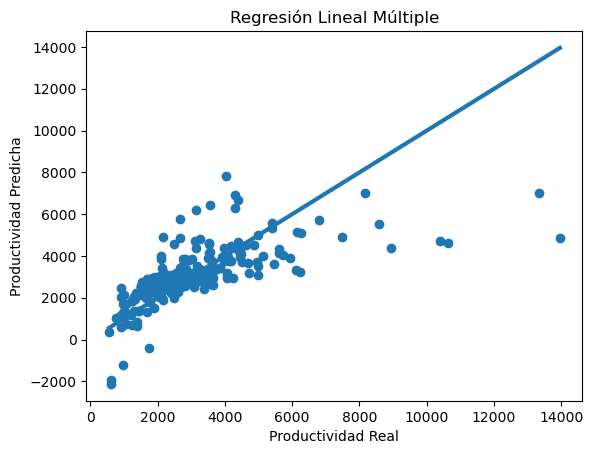

In [9]:
# Realizar la gráfica de dispersión y la pendiente
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=3)

plt.xlabel("Productividad Real")
plt.ylabel("Productividad Predicha")
plt.title("Regresión Lineal Múltiple")
plt.show()

## Analisis y Discusión de Resultados

Al analizar la base de datos, decidí realizar un modelo de regresión lineal múltiple, tomando como variable dependiente la **productividad laboral por empleado**, mientras que las variables que utilicé fueron: **ventas anuales, número de empleados, edad de la empresa, capacitación, acceso a financiamiento, condición de exportadora y uso de pagos digitales**.

Al realizar el modelo de esta manera, me permitió estimar los coeficientes asociados a cada variable individualmente, para así saber cuáles tenían mayor influencia positiva sobre la productividad, éstas siendo **ser empresa exportadora** y **ofrecer capacitación al personal**, seguidas por **el acceso a financiamiento y el uso de pagos digitales**. Esto sugiere que los factores relacionados con competitividad internacional, capital humano y modernización tecnológica tienen un impacto relevante en el desempeño productivo. Por otro lado, **el número de empleados** presenta un coeficiente negativo, lo que indica que mientras hayan más trabajadores en una empresa, existirá una menor productividad por trabajador, posiblemente debido a ineficiencias o rendimientos decrecientes.  Asimismo, se obtuvo un **R² de 0.44** y un **MSE de 2,149,000.84**, lo cual nos indicó que aproximadamente el 44% de la variación en la productividad puede explicarse por el conjunto de variables que elegí.

Como reflexión final, este modelo representa una mejora significativa respecto a la regresión simple que realicé inicialmente, donde solo utilicé las ventas como variable explicativa de la productividad. El análisis múltiple me permitió comprender que la productividad empresarial no depende de un único factor, sino de una combinación de variables estructurales y estratégicas que influyen de manera conjunta en su desempeño. La gráfica de valores reales contra predichos confirma una tendencia positiva consistente con el R² obtenido, aunque con cierta dispersión, lo que refleja la naturaleza multifactorial del fenómeno analizado.
